<a href="https://colab.research.google.com/github/Asser146/ML-Assignments/blob/master/Assignment4/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv('/content/Breast Cancer data.csv')
target = df['diagnosis']
target = target.map({'B': 0, 'M': 1})
del df['id']
del df['diagnosis']
del df['Unnamed: 32']
print(df.shape)
df.head()


(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **K-MEANS**

In [122]:
def kmeans(X, k, max_iters=100, tol=0.0001):

    # Randomize initial centroids
    randomized_indices = np.random.permutation(X.shape[0])[:k]
    centroids = X.iloc[randomized_indices].to_numpy()
    labels = np.zeros(X.shape[0], dtype=int)

    for _ in range(max_iters):
        # Assign each point to the closest centroid
        for i in range(len(X)):
          min_distance = float('inf')
          for j in range(k):
              distance = np.linalg.norm(X.iloc[i].to_numpy() - centroids[j])
              if distance < min_distance:
                  min_distance = distance
                  labels[i] = j

        # Update centroids
        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i]
            cluster_mean = cluster_points.mean(axis=0)
            new_centroids.append(cluster_mean)

        new_centroids = np.array(new_centroids)

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

In [123]:
def elbow_method(X, max_clusters=10):
    costs = []
    for k in range(1, max_clusters + 1):
        centroids, labels = kmeans(X, k)
        cost = np.sum((X.values - centroids[labels]) ** 2)
        costs.append(cost)

    plt.plot(range(1, max_clusters + 1), costs, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cost')
    plt.show()

**Apply K-Means**

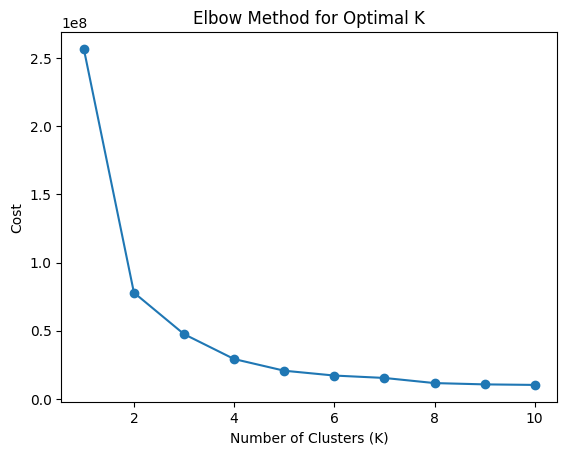

In [124]:
# Plotting the elbow graph
elbow_method(df, 10)

In [125]:
# K at elbow equals 2
centroids , labels = kmeans(df,2)

In [126]:
cost = 0
cost = np.sum((df.values - centroids[labels]) ** 2)
cost = cost / df.shape[0]
print(cost)

136982.6008405955


# PCA

PCA With Best K-Means

In [127]:
def bestPca(df,k):

  # Calculate means of every Dimesion
  means = df.mean()
  # Iterate through every Dimension and shift it towards origin
  for dimension in df.columns:
      df[dimension] = df[dimension] - means[dimension]

  # Calculate the covariance matrix
  cov_matrix = df.cov()

  # Get eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Select K Based on elbow method
  selected_eigenvectors = eigenvectors[:, :k]

  # Project the original data onto the new subspace formed by the selected principal components
  transformed_data = np.dot(df.values, selected_eigenvectors)

  # Reconstruct the data from the reduced-dimensional space
  reconstructed_data = np.dot(transformed_data, selected_eigenvectors.T)
  return reconstructed_data


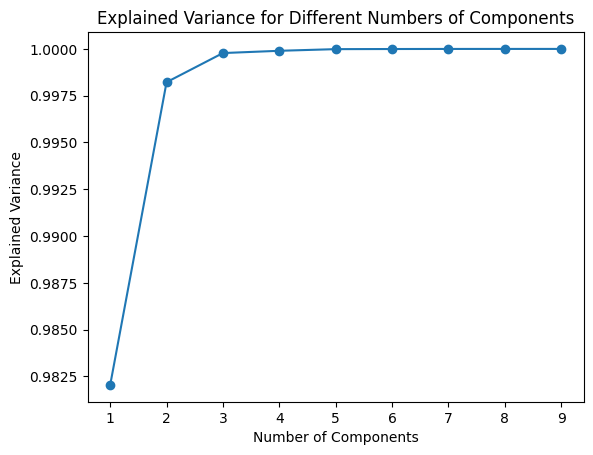

In [128]:
explained_variances = []
max_components = 10
# Loop to explore different numbers of components
for num_components in range(1, max_components):
    transformed_data = bestPca(df, k=num_components)
    explained_variance = np.sum(np.var(transformed_data, axis=0)) / np.sum(np.var(df.values, axis=0))
    explained_variances.append(explained_variance)

# Plot the explained variance curve
plt.plot(range(1, max_components), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Different Numbers of Components')
plt.show()

In [129]:
# Best number of components is 2
reconstructed_data=bestPca(df,2)
error = np.sum((df.values - reconstructed_data) ** 2)
error = error / df.shape[0]
print(error)

802.4383056532407


In [130]:
reconstructed_data= pd.DataFrame(reconstructed_data)
reconstructed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.171125,3.395289,22.250781,349.226454,0.009271,0.047806,0.072976,0.041809,0.015631,0.001696,...,8.467653,7.442779,57.432576,1141.276414,0.030038,0.192768,0.247555,0.094429,0.066923,0.018128
1,6.600210,2.742677,45.496921,669.230230,0.005146,0.051390,0.105166,0.061364,0.008588,-0.003579,...,9.071343,3.686306,62.764900,1073.249106,0.006947,0.124529,0.211648,0.093014,0.020261,0.001183
2,5.428490,2.074497,37.385805,548.007282,0.003639,0.040250,0.084538,0.049395,0.006060,-0.003242,...,7.102372,2.536998,49.242339,828.128100,0.003384,0.090822,0.161347,0.072161,0.011674,-0.000559
3,-2.696781,-0.700238,-18.510394,-267.837971,-0.000727,-0.016320,-0.038427,-0.022579,-0.001181,0.002154,...,-2.874952,-0.358524,-20.125673,-311.923449,0.002564,-0.023981,-0.056961,-0.027940,0.003294,0.003070
4,6.490349,1.497954,44.513723,642.109882,0.001136,0.037194,0.090460,0.053228,0.001805,-0.005491,...,6.548669,0.351510,45.977273,694.301258,-0.008579,0.045730,0.123937,0.062758,-0.013083,-0.008971


**PCA With Different K-Means**

In [131]:
def kPca(df, k_values):
    # Calculate means of every Dimension
    means = df.mean()
    # Iterate through every Dimension and shift it towards origin
    for dimension in df.columns:
        df[dimension] = df[dimension] - means[dimension]
    # Calculate the covariance matrix
    cov_matrix = df.cov()
    # Get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    squrared_error = []
    # Iterate over different values of k
    for k in k_values:
        # Select the first k eigenvectors
        selected_eigenvectors = eigenvectors[:, :k]
        # Project the original data onto the new subspace formed by the selected principal components
        transformed_data = np.dot(df.values, selected_eigenvectors)
        # Reconstruct the data from the reduced-dimensional space
        reconstructed_data = np.dot(transformed_data, selected_eigenvectors.T)
        # Calculate the sum of squared errors
        error = np.sum((df.values - reconstructed_data) ** 2)

        squrared_error.append(error)
    return squrared_error

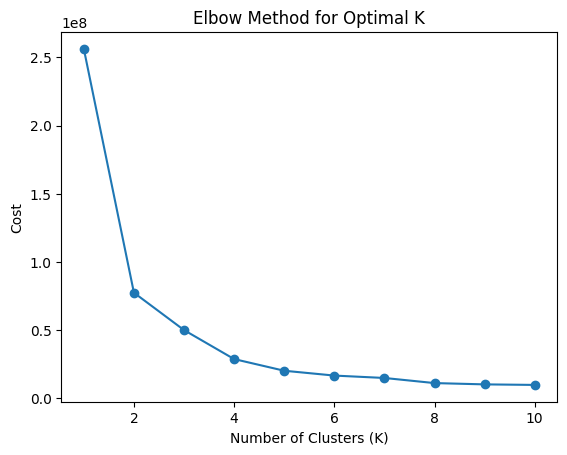

In [132]:
# Plotting the elbow graph
elbow_method(reconstructed_data, 10)

In [133]:
# K at elbow equals 2
centroids_pca , labels_pca = kmeans(df,2)

In [178]:
cost_pca = 0
cost_pca = np.sum((df.values - centroids_pca[labels_pca]) ** 2)
cost_pca = cost_pca / df.shape[0]
print(cost_pca)

1364385.2021249584


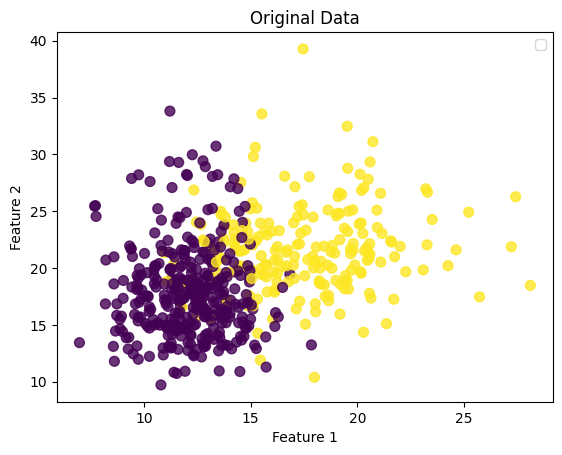

In [194]:
plt.scatter(df.values[:, 0], df.values[:, 1], c=target, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()
plt.show()

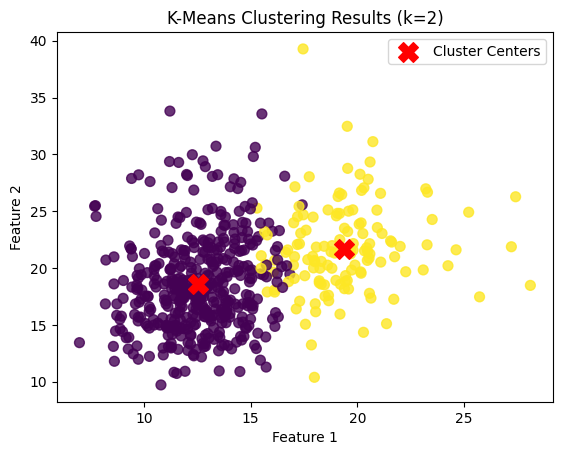

In [195]:
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results (k=2)')
plt.legend()
plt.show()

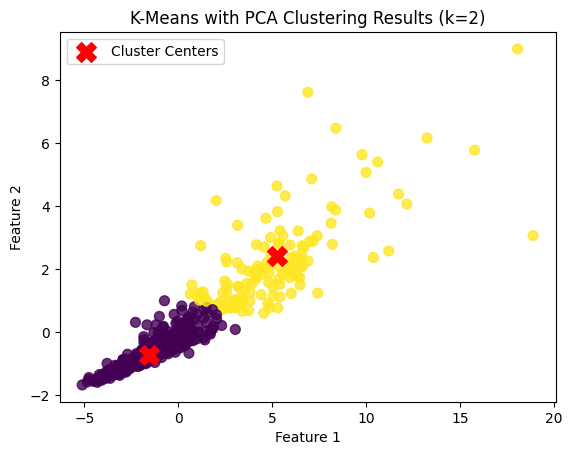

In [196]:
plt.scatter(reconstructed_data.values[:, 0], reconstructed_data.values[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means with PCA Clustering Results (k=2)')
plt.legend()
plt.show()

In [199]:
accuracy = 0
for i in range(len(target.values)):
  if target.values[i] == labels_pca[i]:
    accuracy+=1
accuracy=accuracy/len(target.values)
# If Labels are flipped
if accuracy<0.5:
  accuracy = 1-accuracy
print(accuracy)

0.8541300527240774
